In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("http://cluster.earlham.edu/~apc0013/Chicago_crime.csv")

In [3]:
df.head()

ID Case Number                    Date                  Block  IUCR  \
0  2746413    HJ384532  05/20/2003 08:00:00 PM  072XX S FAIRFIELD AVE  0610   
1  2746414    HJ385055  05/24/2003 09:25:00 PM   015XX W ROOSEVELT RD  0420   
2  2746415    HJ384304  05/24/2003 01:10:00 PM  062XX S CLAREMONT AVE  031A   
3  2746416    HJ384255  05/24/2003 02:00:00 PM       031XX N CLARK ST  0860   
4  2746418    HJ385442  05/25/2003 02:22:00 AM       031XX N BROADWAY  0810   

  Primary Type                     Description Location Description  Arrest  \
0     BURGLARY                  FORCIBLE ENTRY            RESIDENCE   False   
1      BATTERY  AGGRAVATED:KNIFE/CUTTING INSTR             SIDEWALK   False   
2      ROBBERY                  ARMED: HANDGUN               STREET   False   
3        THEFT                    RETAIL THEFT   SMALL RETAIL STORE    True   
4        THEFT                       OVER $500               STREET   False   

   Domestic  ...  Ward  Community Area  FBI Code  X Coordinate Y Coordinate  \
0     False  ...  18.0            66.0        05     1159293.0    1856544.0   
1     False  ...   2.0            28.0       04B     1166352.0    1894784.0   
2     False  ...  15.0            66.0        03     1161795.0    1863307.0   
3     False  ...  44.0             6.0        06     1170274.0    1920971.0   
4     False  ...  44.0             6.0        06     1171708.0    1920869.0   

   Year              Updated On   Latitude  Longitude  \
0  2003  02/28/2018 03:56:25 PM  41.762076 -87.691736   
1  2003  02/28/2018 03:56:25 PM  41.866863 -87.664773   
2  2003  02/28/2018 03:56:25 PM  41.780583 -87.682378   
3  2003  02/28/2018 03:56:25 PM  41.938637 -87.649609   
4  2003  02/28/2018 03:56:25 PM  41.938326 -87.644341   

                        Location  
0  (41.762075613, -87.691735556)  
1  (41.866863003, -87.664772948)  
2   (41.78058266, -87.682377751)  
3   (41.938636968, -87.64960867)  
4  (41.938325571, -87.644341433)  

[5 rows x 22 columns]

In [4]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [5]:
df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df['hour'] = pd.DatetimeIndex(df['Date']).hour

In [12]:
df_model = df[["month", "hour", "Community Area", 'Primary Type']]

In [13]:
df_model.isnull().sum()

month                  0
hour                   0
Community Area    613525
Primary Type           0
dtype: int64

In [53]:
df_model.dropna(inplace=True)

/Users/daikiakiyoshi/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
df_model.isnull().sum()

month             0
hour              0
Community Area    0
Primary Type      0
dtype: int64

In [55]:
from sklearn.model_selection import train_test_split  
X = df_model.drop('Primary Type', axis=1)
y = df_model[['Primary Type']]

In [56]:
y["Primary Type"] = y["Primary Type"].astype('category')
y["type_encoded"] = y["Primary Type"].cat.codes
type_mapping = y

/Users/daikiakiyoshi/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/daikiakiyoshi/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [57]:
y = y[["type_encoded"]]

In [58]:
y.isnull().sum()

type_encoded    0
dtype: int64

In [59]:
X.isnull().sum()

month             0
hour              0
Community Area    0
dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [61]:
from sklearn.neural_network import MLPClassifier 
classifier = MLPClassifier()  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)  

/Users/daikiakiyoshi/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: name 'confusion_matrix' is not defined

In [62]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[     0      0    980 ...      0    872      0]
 [     0      0  21855 ...      0  49871      0]
 [     0      0  79227 ...      0 128217      0]
 ...
 [     0      0    174 ...      0    449      0]
 [     0      0  48735 ...      0 199535      0]
 [     0      0   5448 ...      0   6618      0]]


/Users/daikiakiyoshi/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2051
           1       0.00      0.00      0.00     77418
           2       0.23      0.35      0.28    225855
           3       0.09      0.00      0.00     71566
           4       0.00      0.00      0.00        64
           5       0.00      0.00      0.00      5090
           6       0.19      0.03      0.06    141580
           7       0.00      0.00      0.00     36075
           8       0.00      0.00      0.00     50505
           9       0.00      0.00      0.00      2665
          10       0.00      0.00      0.00      1810
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00      2997
          13       0.00      0.00      0.00       745
          14       0.00      0.00      0.00      1097
          15       0.00      0.00      0.00      2425
          16       0.00      0.00      0.00     57530
          17       0.28    

In [22]:
df["Date"][0] < pd.to_datetime("01/01/2010")

True

In [28]:
data = df[df["Date"] > pd.to_datetime("12/31/2017")]

In [31]:
data["hour"] = data["Date"].apply(lambda x: x.hour)

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


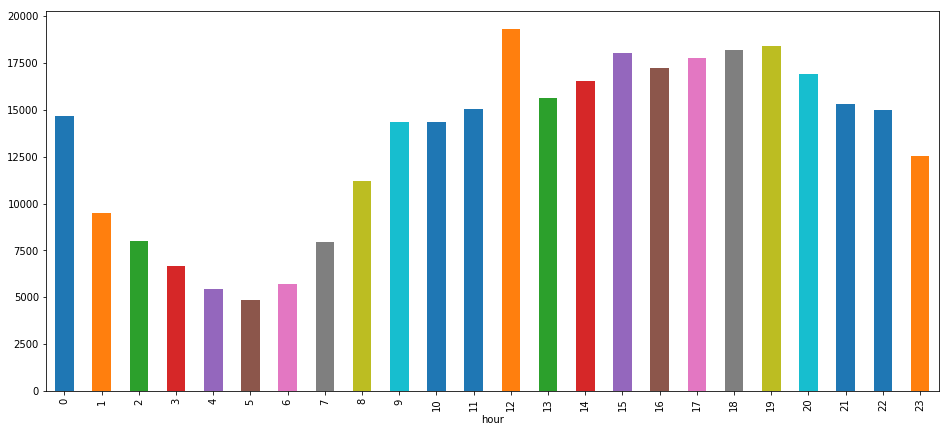

In [34]:
fig, ax = plt.subplots(figsize=(16,7))
data.groupby("hour").count()["Arrest"].plot(kind="bar", ax = ax)

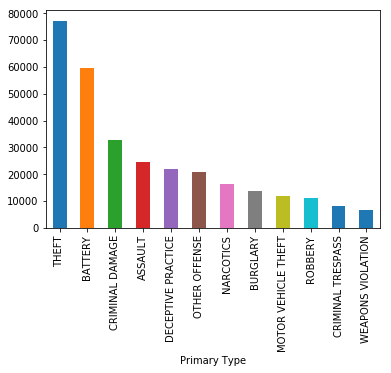

In [44]:
data.groupby("Primary Type").count()["Arrest"].sort_values(ascending = False).head(12).plot(kind="bar")

In [58]:
d = data.groupby("Primary Type").count()["Arrest"].sort_values(ascending = False).head(12)

AttributeError: 'Series' object has no attribute 'columns'

In [68]:
fig, ax = plt.subplots(figsize=(10,10)) 
crime_by_hour = data.groupby(["hour", "Primary Type"]).count()["Arrest"].unstack('Primary Type')
import seaborn as sns
%matplotlib inline
sns.heatmap(crime_by_hour, ax = ax)


